In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
from scipy.interpolate import interp1d
import wfdb

In [45]:

allData = [];
y = []



for i in range(45):

    index = '{:03}'.format(i)
    fileName = 'LabWalks/co' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        y.append(0)
    
    index = '{:03}'.format(i)
    fileName = 'LabWalks/fl' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        y.append(1)

print(np.size(allData))
#wfdb.plot_wfdb(record=record) 
#display(record.__dict__)


73


[[0.43741112 0.40359506 0.35642781 ... 0.67540639 0.64971256 0.62807042]
 [0.4457702  0.42755149 0.38877964 ... 1.01195904 0.88963852 0.73818186]
 [0.35394519 0.31968901 0.29083239 ... 0.82799503 0.79127448 0.75221801]
 ...
 [0.3725345  0.28687154 0.22321327 ... 0.89025344 0.84628401 0.80690635]
 [0.47583749 0.4697944  0.46355965 ... 0.48229705 0.4862872  0.49805689]
 [0.44785005 0.40334966 0.35915581 ... 0.57218447 0.56026264 0.55229289]]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]


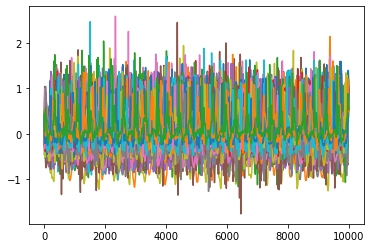

In [78]:
SkipedCycles = 5
NumOfCycles = 40
NumOfSamples = 10000

X = np.zeros((len(allData), NumOfSamples))

j = 0
for one in allData:
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    TH = 0.5
    
    index = 0
    for i in range(SkipedCycles):
        while scaledData[index] < TH:
            index = index + 1
        while scaledData[index] >= TH:
            index = index + 1
    startIndex = index
    for i in range(NumOfCycles):
        while scaledData[index] < TH:
            index = index + 1
        while scaledData[index] >= TH:
            index = index + 1
    endIndex = index

    usedData = scaledData[startIndex: endIndex]
    f = interp1d(range(len(usedData)), usedData, kind='cubic')
    x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
    processedData = f(x)
    plt.plot(processedData)
    X[j,:] = processedData
    j = j + 1

print(X)
print(y)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
import datetime as dt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_test)

[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]


In [91]:
param_C = 1
param_gamma = 0.8

classifier = svm.SVC(C=param_C,gamma=param_gamma,tol=0.001)
#classifier = svm.LinearSVC(C=param_C)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

expected = y_test
predicted = classifier.predict(X_test)
print(expected)
print(predicted)

      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))


Start learning at 2019-10-24 17:47:28.193105
Stop learning 2019-10-24 17:47:28.237021
Elapsed learning 0:00:00.043916
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix:
[[0 9]
 [0 6]]
Accuracy=0.4
